<a href="https://colab.research.google.com/github/FernandoCallasaca/data_science_projects/blob/main/Automobile_Dataset_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparamos nuestro entorno de trabajo

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd '/content/drive/My Drive/Data Science/Proyectos/Automobile Dataset/'
!ls

/content/drive/My Drive/Data Science/Proyectos/Automobile Dataset
 auto.csv			     automobile-with-names.csv
'Automobile Dataset.ipynb'	     auto-procesado.csv
'Automobile Dataset Parte 2.ipynb'


In [8]:
def path_file(name_file):
  return '/content/drive/My Drive/Data Science/Proyectos/Automobile Dataset/{0}'.format(name_file)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.__version__

'1.1.5'

In [44]:
pd.options.display.float_format = '{:,.2f}'.format

# Leemos nuestra data

In [10]:
path_read_file = path_file('auto-procesado.csv')
path_read_file

'/content/drive/My Drive/Data Science/Proyectos/Automobile Dataset/auto-procesado.csv'

In [11]:
df = pd.read_csv(path_read_file)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,Low,0,1


In [13]:
df.shape

(201, 28)

In [14]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,9.944145,8.044957,13207.129353,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,2.534599,1.840739,7947.066342,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,6.911765,7775.000000,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,9.791667,7.833333,10295.000000,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,9.400000,16500.000000,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,14.687500,45400.000000,1.000000,1.000000


In [16]:
df.describe(include = ['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,153


In [17]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,0.066171,-0.029807,-0.082391,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,0.238567,0.181189,0.133999,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,0.476153,0.577576,0.584642,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,0.657373,0.707108,0.690628,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,0.673363,0.736728,0.751265,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,0.003811,0.084301,0.135486,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,0.785353,0.836921,0.834415,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,0.745059,0.783465,0.872335,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,0.554610,0.559112,0.543155,0.054458,-0.054458
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,0.036133,0.047089,0.082269,0.241064,-0.241064


# Empezamos a verificar qué variables nos serviría para la predicción

## Variables Continuas

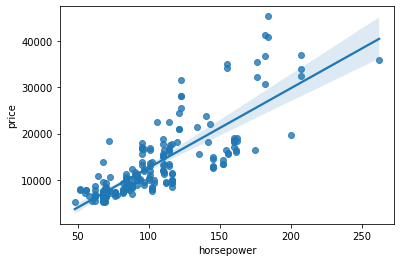

In [24]:
## 'horsepower'
sns.regplot(x = 'horsepower', y = 'price', data = df)
# nos damos cuenta que esta variable es una potencial variable de predicción

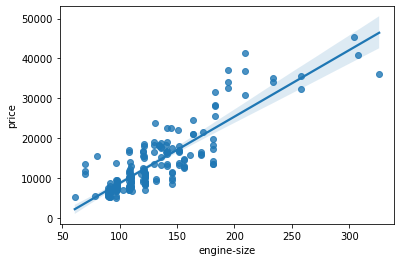

In [25]:
# 'engine-size'
sns.regplot(x = 'engine-size', y = 'price', data = df)
# igualmente es una variable potencial de predicción

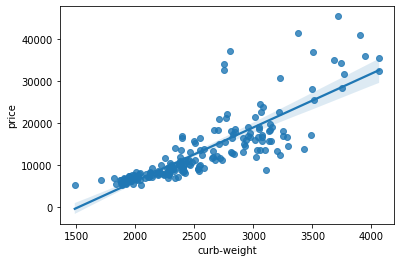

In [26]:
# 'curb-weight'
sns.regplot(x = 'curb-weight', y = 'price', data = df)

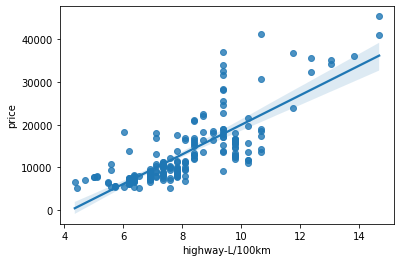

In [27]:
# 'highway-L/100km'
sns.regplot(x = 'highway-L/100km', y = 'price', data = df)
# este también es una variable potencial de predicción

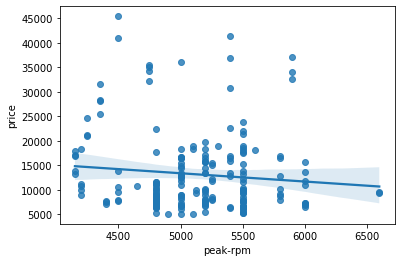

In [28]:
# 'peak-rpm'
sns.regplot(x= 'peak-rpm', y = 'price', data = df)
# esta variable no es una variable potencial para nuestr predicción

In [29]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


## Variables categóricas

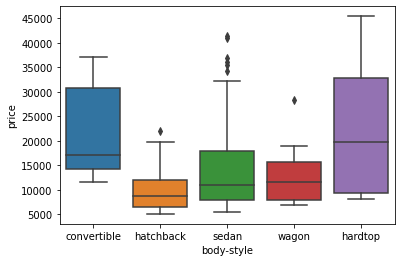

In [36]:
# 'body-style'
sns.boxplot(x = 'body-style', y = 'price', data = df)
# como las variables tienen una superposición entonces no es un buen predictor del precio

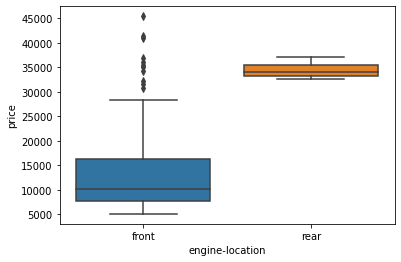

In [35]:
# 'engine-location'
sns.boxplot(x = 'engine-location', y = 'price', data = df)
# esta variable si es un buen indicador de predicción

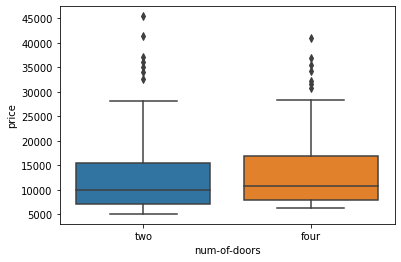

In [34]:
# 'num-of-doors'
sns.boxplot(x = 'num-of-doors', y = 'price', data = df)
# esta variable no nos sirve para predecir

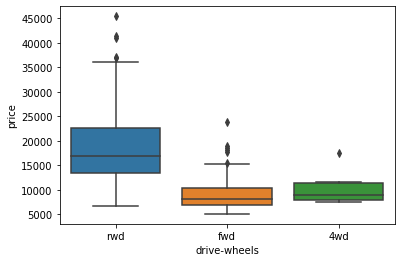

In [38]:
# 'drive-wheels'
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)
# aquí la distribución del precio es diferente entonces podrían potencialmente
# predecir el precio

In [46]:
# agrupamos por 'body-style' la media de precio de cada 'body-style'
df_group_1 = df[['body-style', 'price']]
df_group_1.groupby('body-style', as_index = False).mean()

,body-style,price
0,convertible,"21,890.50"
1,hardtop,"22,208.50"
2,hatchback,"9,957.44"
3,sedan,"14,459.76"
4,wagon,"12,371.96"


In [45]:
# agrupamos por 'drive-wheels' y 'body-style' y sacamos la media por precio
df_grupo_2 = df[['drive-wheels', 'body-style', 'price']]
df_grupo_2.groupby(['drive-wheels', 'body-style'], as_index = False).mean()

,drive-wheels,body-style,price
0,4wd,hatchback,"7,603.00"
1,4wd,sedan,"12,647.33"
2,4wd,wagon,"9,095.75"
3,fwd,convertible,"11,595.00"
4,fwd,hardtop,"8,249.00"
5,fwd,hatchback,"8,396.39"
6,fwd,sedan,"9,811.80"
7,fwd,wagon,"9,997.33"
8,rwd,convertible,"23,949.60"
9,rwd,hardtop,"24,202.71"


In [49]:
# La mejor manera es hacerlo con pivot
# para eso tenemos que tener un grupo ya estructurado
df_group = df_grupo_2.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
grouped_pivot = df_group.pivot(index = 'drive-wheels', columns = 'body-style')
grouped_pivot

price                                        
body-style   convertible   hardtop hatchback     sedan     wagon
drive-wheels                                                    
4wd                  nan       nan  7,603.00 12,647.33  9,095.75
fwd            11,595.00  8,249.00  8,396.39  9,811.80  9,997.33
rwd            23,949.60 24,202.71 14,337.78 21,711.83 16,994.22

In [52]:
grouped_pivot.replace(np.nan, 0, inplace = True)
grouped_pivot

price                                        
body-style   convertible   hardtop hatchback     sedan     wagon
drive-wheels                                                    
4wd                 0.00      0.00  7,603.00 12,647.33  9,095.75
fwd            11,595.00  8,249.00  8,396.39  9,811.80  9,997.33
rwd            23,949.60 24,202.71 14,337.78 21,711.83 16,994.22

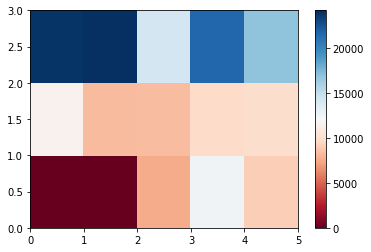

In [53]:
# ahora usaremos el gruped_pivot
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

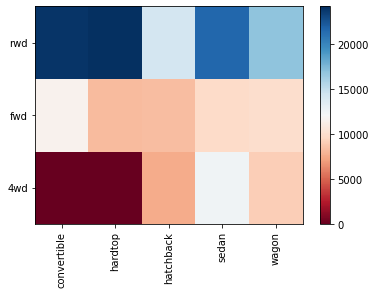

In [55]:
# para un mejor entendimiento de la imagen anterior 
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# aquí colocamos los nombres
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# movemos los nombres al centro nombre = label
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# insertamos los nombres
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# girar los nombres si es demasiado larga
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# Correlation and Causation